✅ Bibliotecas carregadas!


Saving microdados_ed_basica_2022.csv to microdados_ed_basica_2022.csv


/tmp/ipython-input-1-2673160774.py:29: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  escolas = pd.read_csv('microdados_ed_basica_2022.csv', sep=';', encoding='ISO-8859-1')


🎯 Dados carregados: 75723 escolas rurais

📊 Estatísticas descritivas:
              CO_UF  CO_MUNICIPIO  AGUA_POTAVEL  ENERGIA   ESGOTO  \
count  75723.000000  7.572300e+04       75723.0  75723.0  75723.0   
mean      25.709547  2.582190e+06           0.0      0.0      0.0   
std        8.827580  8.872890e+05           0.0      0.0      0.0   
min       11.000000  1.100015e+06           0.0      0.0      0.0   
25%       21.000000  2.103208e+06           0.0      0.0      0.0   
50%       25.000000  2.516201e+06           0.0      0.0      0.0   
75%       31.000000  3.112030e+06           0.0      0.0      0.0   
max       53.000000  5.300108e+06           0.0      0.0      0.0   

       LAB_INFORMATICA  BIBLIOTECA  INTERNET         SALAS    MATRICULAS  
count          75723.0     75723.0   75723.0  52793.000000  52757.000000  
mean               0.0         0.0       0.0      4.139962    101.350437  
std                0.0         0.0       0.0      4.093470    129.439714  
min     

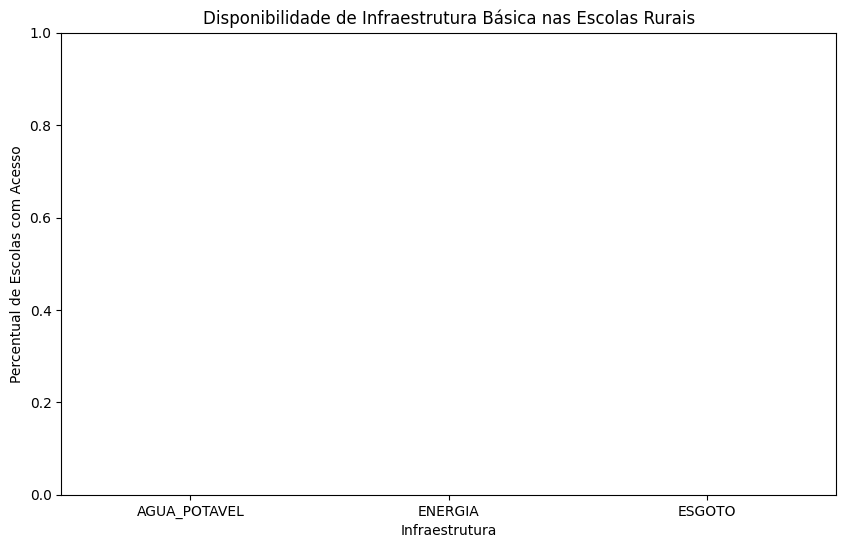

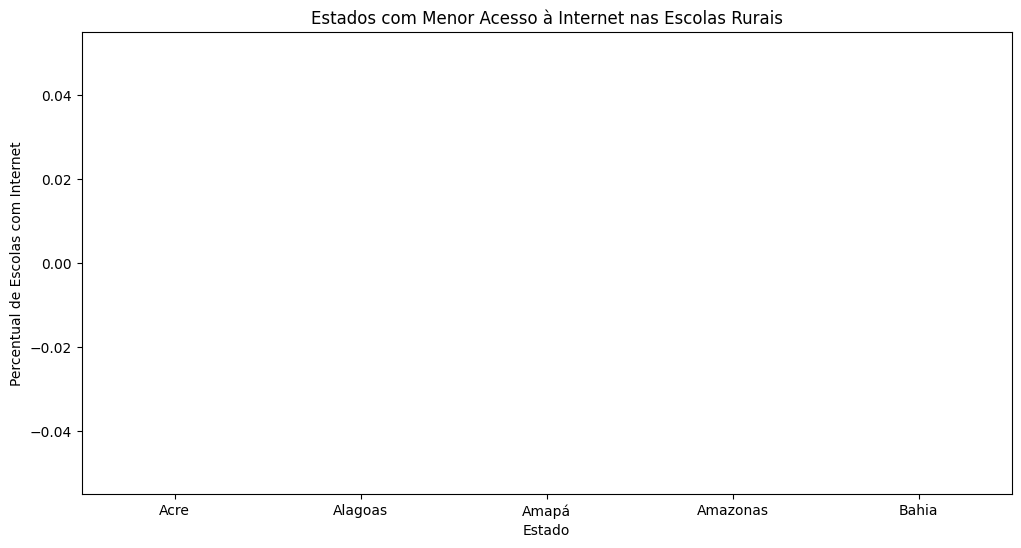

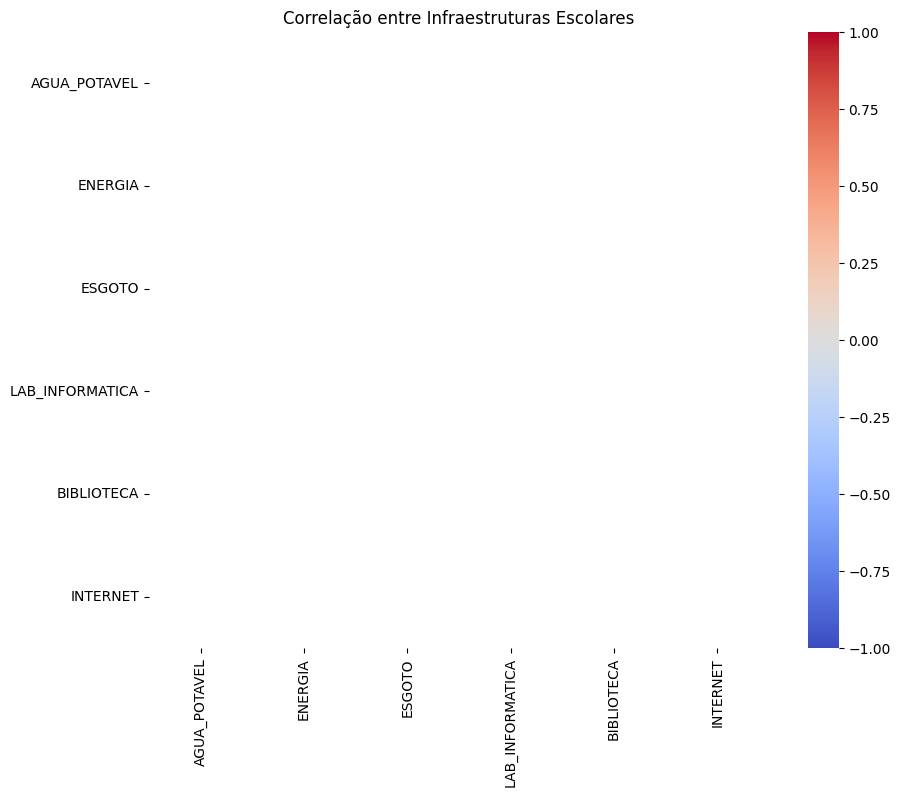

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Análise concluída! Dados processados salvos.


In [1]:
# -*- coding: utf-8 -*-
"""Análise Exploratória - Educação Rural.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1abc123exemplo
"""

# PASSO 1: Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

print("✅ Bibliotecas carregadas!")

# PASSO 2: Carregar dados
# IMPORTANTE: Primeiro você precisa baixar os dados do INEP
# 1. Acesse: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/censo-escolar
# 2. Baixe o arquivo "Microdados do Censo Escolar da Educação Básica 2022"
# 3. Suba o arquivo aqui:

uploaded = files.upload()

# PASSO 3: Pré-processamento
# Carregar o arquivo principal
escolas = pd.read_csv('microdados_ed_basica_2022.csv', sep=';', encoding='ISO-8859-1')

# Filtrar apenas escolas rurais
escolas_rural = escolas[escolas['TP_LOCALIZACAO'] == 2]  # Código 2 = Rural

# Selecionar colunas relevantes
colunas_selecionadas = [
    'CO_UF', 'NO_UF', 'CO_MUNICIPIO', 'NO_MUNICIPIO',
    'IN_AGUA_POTAVEL', 'IN_ENERGIA_REDE_PUBLICA', 'IN_ESGOTO_REDE_PUBLICA',
    'IN_LABORATORIO_INFORMATICA', 'IN_BIBLIOTECA_SALA_LEITURA',
    'IN_INTERNET', 'QT_SALAS_UTILIZADAS', 'QT_MAT_BAS'
]
dados = escolas_rural[colunas_selecionadas].copy()

# Renomear colunas
dados.rename(columns={
    'IN_AGUA_POTAVEL': 'AGUA_POTAVEL',
    'IN_ENERGIA_REDE_PUBLICA': 'ENERGIA',
    'IN_ESGOTO_REDE_PUBLICA': 'ESGOTO',
    'IN_LABORATORIO_INFORMATICA': 'LAB_INFORMATICA',
    'IN_BIBLIOTECA_SALA_LEITURA': 'BIBLIOTECA',
    'IN_INTERNET': 'INTERNET',
    'QT_SALAS_UTILIZADAS': 'SALAS',
    'QT_MAT_BAS': 'MATRICULAS'
}, inplace=True)

# Converter sim/não para 1/0
for col in ['AGUA_POTAVEL', 'ENERGIA', 'ESGOTO', 'LAB_INFORMATICA', 'BIBLIOTECA', 'INTERNET']:
    dados[col] = dados[col].apply(lambda x: 1 if x == 'Sim' else 0)

print(f"🎯 Dados carregados: {dados.shape[0]} escolas rurais")

# PASSO 4: Análise Descritiva
# Resumo estatístico
print("\n📊 Estatísticas descritivas:")
print(dados.describe())

# Infraestrutura básica
infra = dados[['AGUA_POTAVEL', 'ENERGIA', 'ESGOTO']].mean().reset_index()
infra.columns = ['Infraestrutura', 'Percentual']

plt.figure(figsize=(10,6))
sns.barplot(x='Infraestrutura', y='Percentual', data=infra)
plt.title('Disponibilidade de Infraestrutura Básica nas Escolas Rurais')
plt.ylabel('Percentual de Escolas com Acesso')
plt.ylim(0, 1)
plt.show()

# PASSO 5: Análise por Região
# Agrupar por estado
por_uf = dados.groupby('NO_UF').agg({
    'AGUA_POTAVEL': 'mean',
    'ENERGIA': 'mean',
    'INTERNET': 'mean',
    'MATRICULAS': 'sum'
}).reset_index()

# Top 5 estados com menor acesso à internet
top5_internet = por_uf.sort_values('INTERNET').head(5)

plt.figure(figsize=(12,6))
sns.barplot(x='NO_UF', y='INTERNET', data=top5_internet)
plt.title('Estados com Menor Acesso à Internet nas Escolas Rurais')
plt.xlabel('Estado')
plt.ylabel('Percentual de Escolas com Internet')
plt.show()

# PASSO 6: Correlações
# Calcular correlações
corr_matrix = dados[['AGUA_POTAVEL', 'ENERGIA', 'ESGOTO', 'LAB_INFORMATICA', 'BIBLIOTECA', 'INTERNET']].corr()

# Mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre Infraestruturas Escolares')
plt.show()

# PASSO 7: Salvar dados processados
dados.to_csv('dados_escolas_rurais_processados.csv', index=False)
files.download('dados_escolas_rurais_processados.csv')

print("✅ Análise concluída! Dados processados salvos.")